### Business Context
The rise of electronic news portals has provided a convenient way to stay updated on global events. These portals gather information from online databases, process it using various software, and deliver it to users swiftly. Unlike traditional newspapers, e-news portals offer advantages like faster access to content and the integration of multimedia elements such as audio, graphics, and video. E-news Express, an online news portal, aims to boost its subscriber base by improving user engagement on its website. The company suspects that a decline in monthly subscribers may be due to shortcomings in the current webpage design. To address this, they've created a new landing page with enhanced structure and relevant content. They've conducted an experiment using A/B testing to compare user responses to the old and new landing pages, aiming to determine which design is more effective in attracting new subscribers.

### Objectives
The design team of the company has researched and created a new landing page that has a new outline & more relevant content shown compared to the old page. In order to test the effectiveness of the new landing page in gathering new subscribers, the Data Science team conducted an experiment by randomly selecting 100 users and dividing them equally into two groups. The existing landing page was served to the first group (control group) and the new landing page to the second group (treatment group). Data regarding the interaction of users in both groups with the two versions of the landing page was collected. Being a data scientist in E-news Express, you have been asked to explore the data and perform a statistical analysis (at a significance level of 5%) to determine the effectiveness of the new landing page in gathering new subscribers for the news portal by answering the following questions:

1.   Determine if users spend more time on the new landing page compared to the existing landing page.
2.   Assess if the conversion rate (proportion of users who visit the landing page and subscribe) for the new page is higher than that for the old page.
3.   Investigate whether the conversion status depends on the preferred language of the users.
4.   Evaluate if the time spent on the new page varies among users of different languages.

## Import all the necessary libraries

In [ ]:
# Import libraries for reading and manipulating data
import numpy as np
import pandas as pd

# Import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Import library for statistical analysis
import scipy.stats as stats

## Reading the Data into a DataFrame

In [ ]:
# Mount Google Drive to access dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Read the data
df = pd.read_csv('/content/drive/MyDrive/abtest.csv')

## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [ ]:
# View the first few rows of the dataset
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [ ]:
# View the last few rows of the dataset
df.tail()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
95,546446,treatment,new,5.15,no,Spanish
96,546544,control,old,6.52,yes,English
97,546472,treatment,new,7.07,yes,Spanish
98,546481,treatment,new,6.20,yes,Spanish
99,546483,treatment,new,5.86,yes,English


In [ ]:
# Check the shape of the dataset
print(df.shape)

(100, 6)


In [ ]:
# Use describe() to print a concise summary of the dataset
df.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,100.0,NaN,NaN,NaN,546517.0,52.295779,546443.0,546467.75,546492.5,546567.25,546592.0
group,100,2,control,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
landing_page,100,2,old,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time_spent_on_the_page,100.0,NaN,NaN,NaN,5.3778,2.378166,0.19,3.88,5.415,7.0225,10.71
converted,100,2,yes,54,NaN,NaN,NaN,NaN,NaN,NaN,NaN
language_preferred,100,3,Spanish,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Use info() to find the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


In [ ]:
# Use the isnull() function to to see if there are any missing values in the data
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

In [ ]:
# Use the isna() function to see if there are any duplicate values in the data
df.isna().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

### Observations

*   There are 100 rows and 6 columns as described by the shape function. There is one numerical column and 5 object-type columns.
*   There appear to be no missing values in the data.
*   There appear to be no duplicate values in the data.


### Univariate Analysis

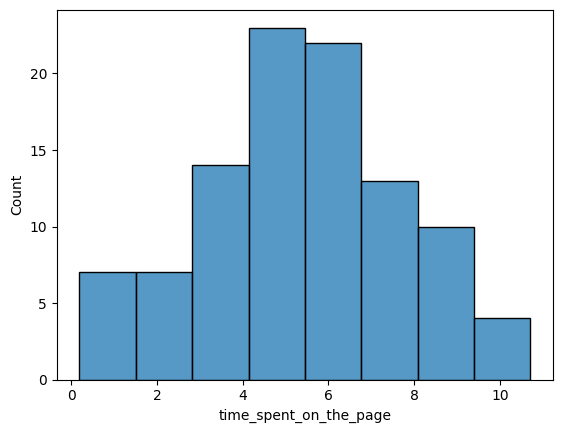

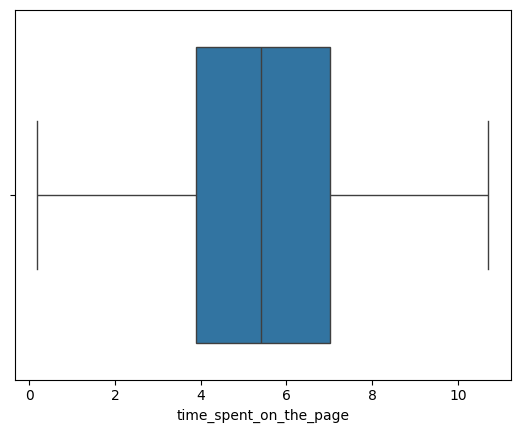

In [ ]:
# Visualization of 'time_spent_on_the_page'
sns.histplot(data=df,x='time_spent_on_the_page')
plt.show()
sns.boxplot(data=df,x='time_spent_on_the_page')
plt.show()

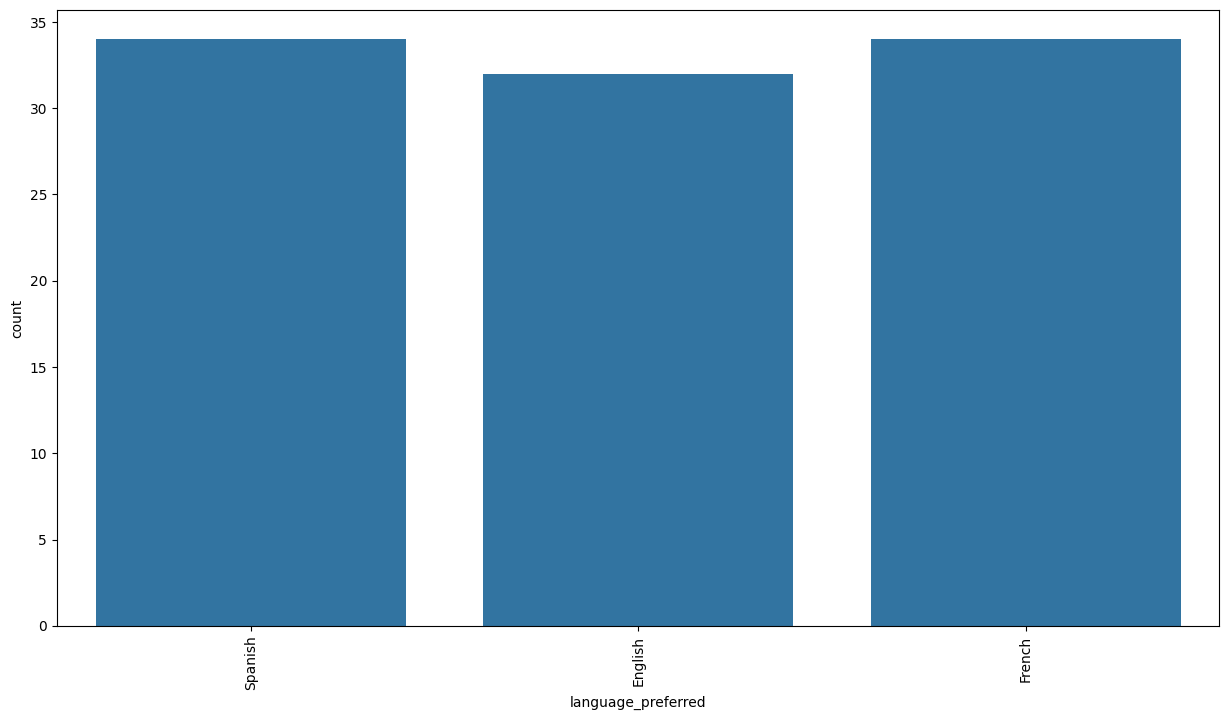

In [ ]:
# Visualization of 'language_preferred'
plt.figure(figsize=(15,8))
sns.countplot(data=df, x='language_preferred')
plt.xticks(rotation=90);

### Observations



*   Time spent on the page appears to have close to a normal distribution, with an average time of 5.38 minutes.
*   Group and landing_page variables are split with 50 for each of their two categories. Group has "control" and "treatment", while landing_page has "old" and "new". This follows the context laid out above where the treatment group was given the new landing page and the control group was given the old landing page.
*   There were slightly more French and Spanish preferred language users than English preferred language users.
*   There were slightly more converted users than not converted users.


### Bivariate Analysis

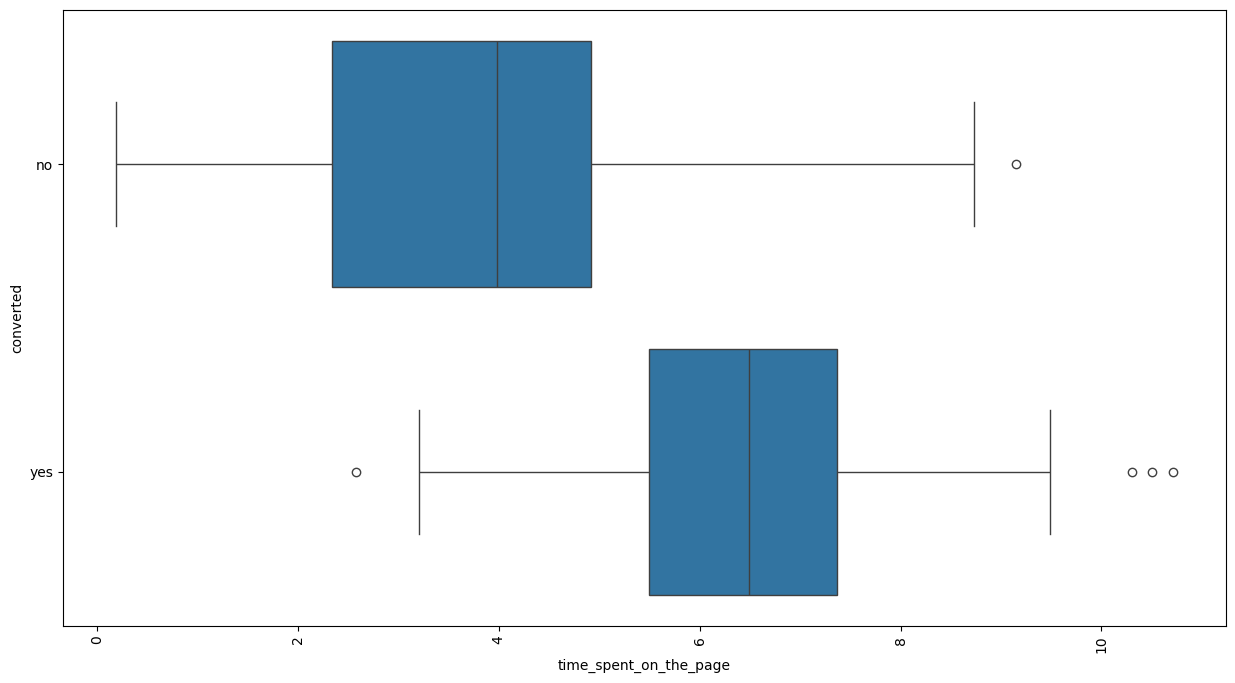

In [ ]:
# Visualization of conversion status vs. time spent on the page
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='time_spent_on_the_page', y='converted')
plt.xticks(rotation=90);

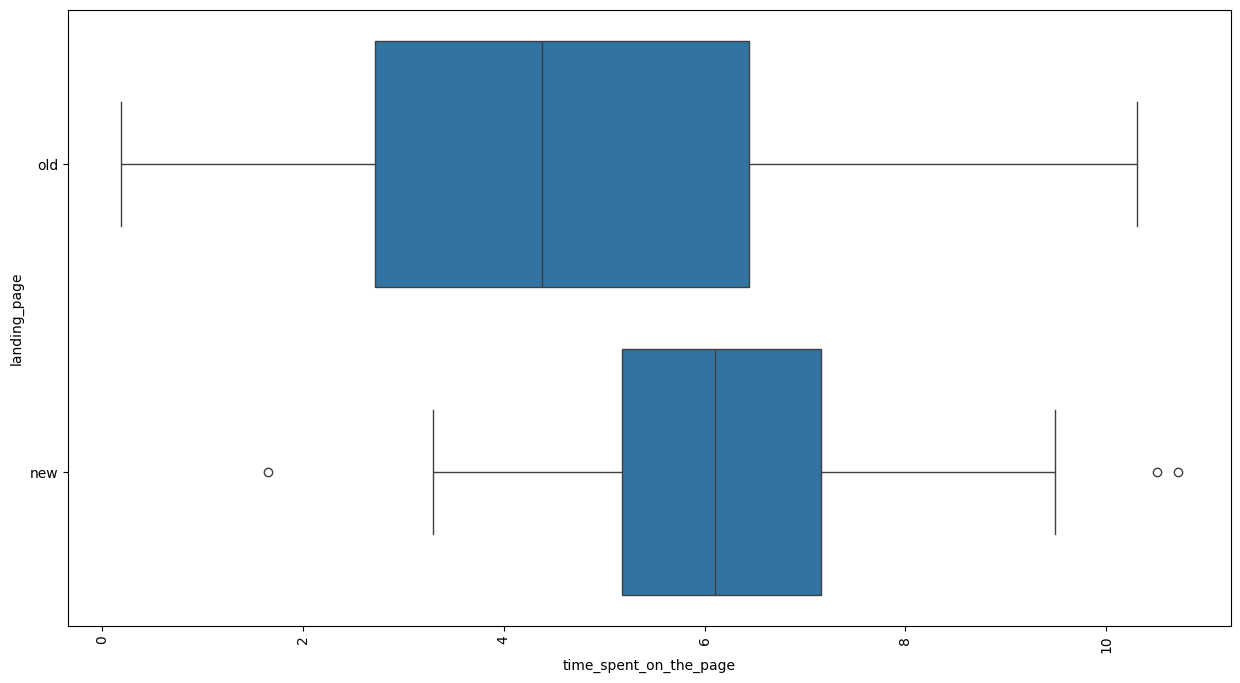

In [ ]:
# Visualization of landing page vs. time spent on the page
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='time_spent_on_the_page', y='landing_page')
plt.xticks(rotation=90);

### Observations



*   75 percent of users that were converted spent at least 5 minutes on the page, while 75 percent of users that were not converted spent less than 5 minutes on the page.
*   75 percent of users that were given the new landing page spent at least 5 minutes on the page, and 50 percent of users that were given the old landing page spent less than about 4.5 minutes on the page.
*   At least 75 percent of all users, regardless of preferred language, spent 7 minutes or less on the page.
*   Users with a preferred language of English or Spanish had a greater than 50 percent conversion percentage, while users with a preferred language of French were converted at less than 50 percent. Users with a preferred language of English had the most conversions.
*   Users that were given the new landing page had a higher conversion percentage than those that were given the old landing page.



## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

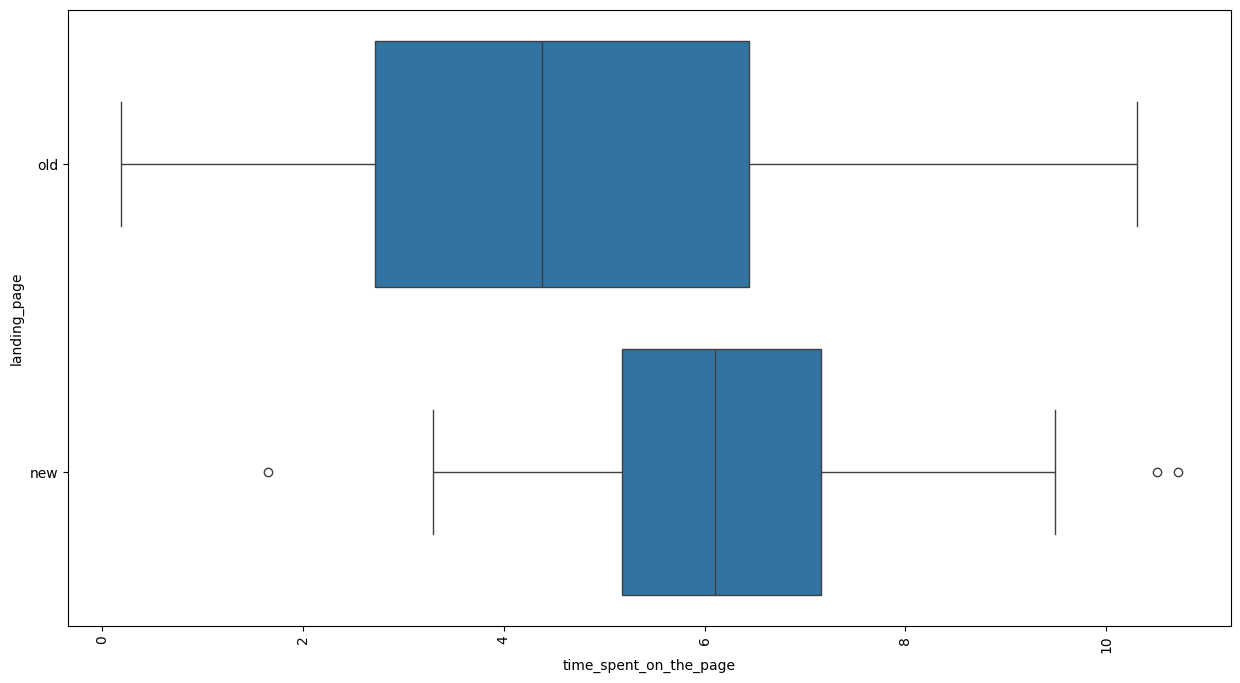

In [ ]:
# Visual Analysis of landing page vs. time spent on page
plt.figure(figsize=(15,8))
sns.boxplot(data=df, x='time_spent_on_the_page', y='landing_page')
plt.xticks(rotation=90);

### Step 1: Define the null and alternate hypotheses

$H_0$: The mean time spent on the old landing page is equal to the mean time spent on the new landing page.

$H_a$: The mean time spent on the new landing page is more than the mean time spent on the old landing page


### Step 2: Select Appropriate test

The is a one-tailed test with two independent populations that have unknown standard deviations. Therefore, we will use a two sample independent t-test.

### Step 3: Decide the significance level

The problem statement gives a signifcance level of 5%, or $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [ ]:
# Generate dataframe for new landing page users
site_time_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']

# Generate dataframe for old landing page users
site_time_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

# Print the standard deviations
print('The sample standard deviation of the time spent on the new page is:', round(site_time_new.std(),2))
print('The sample standard deviation of the time spent on the old page is:', round(site_time_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the old page is: 2.58


### Step 5: Calculate the p-value

In [ ]:
# Import required functions
from scipy.stats import ttest_ind

# Find the p-value
test_stat, p_value = ttest_ind(site_time_new, site_time_old, equal_var = False, alternative = 'greater')

# Print the p-value
print('The p-value is', p_value)

The p-value is 0.0001392381225166549


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# Use if-else statement to print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance (0.05), we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance (0.05), we fail to reject the null hypothesis.')

As the p-value 0.0001392381225166549 is less than the level of significance (0.05), we reject the null hypothesis.


### Step 7:  Draw inference

Since we reject the null hypothesis, we can infer that users spent more time on the site with the new landing page than they did with the old landing page.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

### Perform Visual Analysis

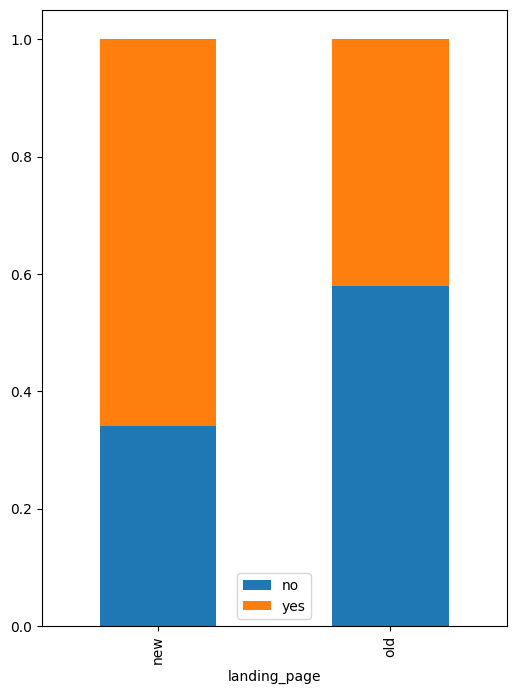

In [ ]:
# Visual analysis of conversion rate of landing pages using a stacked bar chart
pd.crosstab(df['landing_page'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

### Step 1: Define the null and alternate hypotheses

$H_0$: The conversion rate for the new and the old pages are the same.

$H_a$: The conversion rate for the new page is greater than the conversion rate for the old page


### Step 2: Select Appropriate test

This is a one-tailed test concerning two population proportions from two independent populations. Therefore, we will use a 2-sample z-test.

### Step 3: Decide the significance level

The problem statement gives a signifcance level of 5%, or $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [ ]:
# Find the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']
# Find the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']

# Count the total number of users in the control group
n_control = df.group.value_counts()['control']
# Count the total number of users in the treatment group
n_treatment = df.group.value_counts()['treatment']

print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


### Step 5: Calculate the p-value

In [ ]:
# Import proportions_ztest
from statsmodels.stats.proportion import proportions_ztest

# Run the 2-sample z-test
test_stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative ='larger')

# Print the p-value
print('The p-value is', p_value)

The p-value is 0.008026308204056278


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# Use if-else statement to print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance (0.05), we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance (0.05), we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance (0.05), we reject the null hypothesis.


### Step 7:  Draw inference

Since we reject the null hypothesis, we can infer that the conversion rate for the new landing page is greater than the conversion rate for the old landing page.

## 3. Is the conversion and preferred language are independent or related?

### Perform Visual Analysis

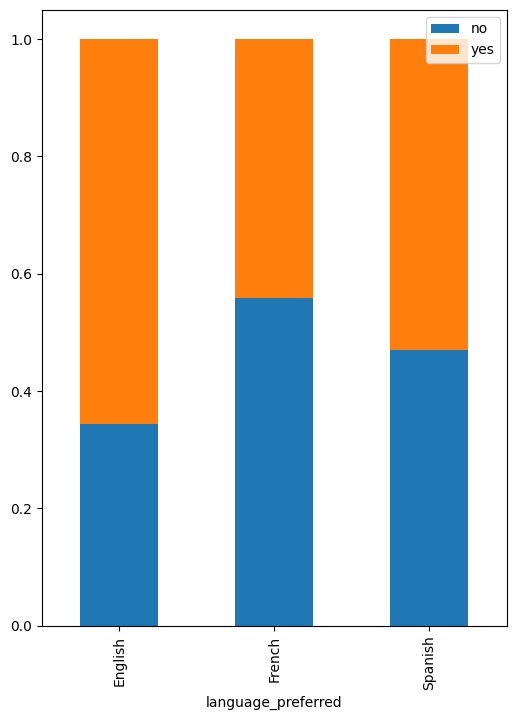

In [ ]:
# Visual analysis of conversion rate of preferred languages using a stacked bar chart
pd.crosstab(df['language_preferred'],df['converted'],normalize='index').plot(kind="bar", figsize=(6,8),stacked=True)
plt.legend()
plt.show()

### Step 1: Define the null and alternate hypotheses

$H_0$: The conversion rate is independent of preferred language.

$H_a$: The conversion rate depends on preferred language.


### Step 2: Select Appropriate test

This is a problem of the test of independence regarding preferred language and converted status, which are two categorical variables.Therefore, we will use a chi-square test for independence.

### Step 3: Decide the significance level

The problem statement gives a signifcance level of 5%, or $\alpha = 0.05$.

### Step 4: Collect and prepare data

In [ ]:
# Generate a contingency table showing the distribution of the three categorical variables
contingency_table = pd.crosstab(df['language_preferred'], df['converted'])

contingency_table

converted,no,yes
language_preferred,,
English,11,21
French,19,15
Spanish,16,18


### Step 5: Calculate the p-value

In [ ]:
# Import the chi2_contingency function
from scipy.stats import chi2_contingency

# Calculate the p-value using the chi2_contingency function
chi2, p_value, dof, exp_freq = chi2_contingency(contingency_table)

print('The p-value is', p_value)

The p-value is 0.2129888748754345


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# Use if-else statement to print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance (0.05), we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance (0.05), we fail to reject the null hypothesis.')

As the p-value 0.2129888748754345 is greater than the level of significance (0.05), we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since we fail to reject the null hypothesis, we cannot infer that the preferred language influences the conversion rate of users.

## 4. Is the time spent on the new page same for the different language users?

### Perform Visual Data Analysis

In [ ]:
# Pull out users who visited the new page
df_new = df[df['landing_page'] == 'new']

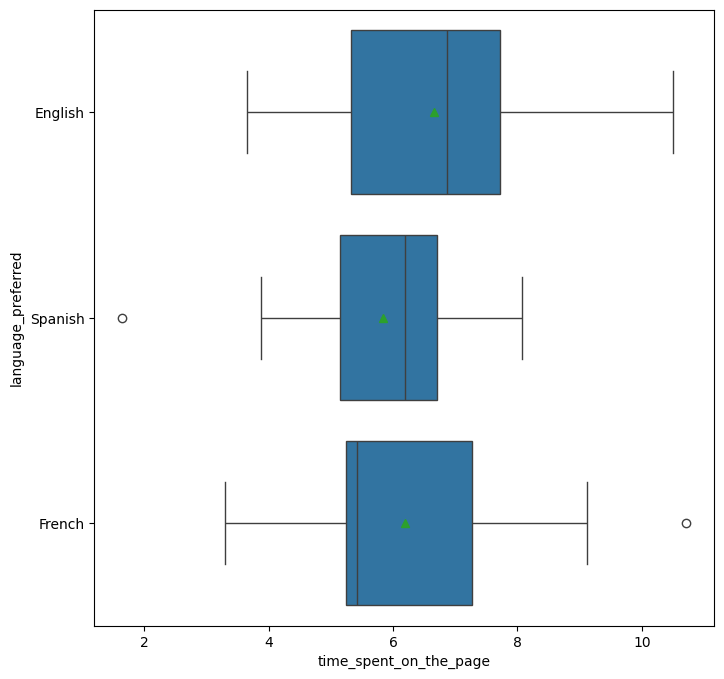

In [ ]:
# Use a boxplot to compare the average time spent on the page for different preferred languages
plt.figure(figsize=(8,8))
sns.boxplot(x = 'time_spent_on_the_page', y = 'language_preferred', showmeans = True, data = df_new)
plt.show()

In [ ]:
# Use the groupby() function to calcuate the mean time spent on the page for each preferred language
df_new.groupby(['language_preferred'])['time_spent_on_the_page'].mean()

language_preferred
English    6.663750
French     6.196471
Spanish    5.835294
Name: time_spent_on_the_page, dtype: float64

### Step 1: Define the null and alternate hypotheses

$H_0:$ The mean time spent on the new landing page is the same across all three preferred languages.

$H_a:$ At least one of the preferred language's mean time spent on the new landing page will be different.


### Step 2: Select Appropriate test

We will use an Analysis of Variance test, as this problem concerns more than two population means.

### Step 3: Decide the significance level

As given in the problem statement, we select α = 0.05.

### Step 4: Collect and prepare data

In [ ]:
# Generate a new dataframe of the time spent on the new page by English language users
English_time_spent = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page']

# Generate a new dataframe of the time spent on the new page by French language users
French_time_spent = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page']

# Generate a new dataframe of the time spent on the new page by Spanish language users
Spanish_time_spent = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [ ]:
# Import the f_oneway function
from scipy.stats import f_oneway

# Calculate the p-value using the f_oneway function
test_stat, p_value = f_oneway(English_time_spent, French_time_spent, Spanish_time_spent)

print('The p-value is', p_value)

The p-value is 0.43204138694325955


### Step 6: Compare the p-value with $\alpha$

In [ ]:
# Use if-else statement to print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance (0.05), we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance (0.05), we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance (0.05), we fail to reject the null hypothesis.


### Step 7:  Draw inference

Since we fail to reject the null hypothesis, we can infer that the mean time spent on the new landing page is the same across all three preferred languages.

## Conclusion and Business Recommendations

### Conclusions

1. The data indicates that the new landing page design is more engaging, as it has a higher mean user time spent on it than the old landing page does.
2. The new landing page also appears to be significantly more effective at converting users than the old landing page.
3. Users' preferred language does not seem to significantly influence their conversion rate.
4. The mean time spent on the new landing page appears to be same regardless of the user's preferred language.

### Business Recommendations

1. The implemention of the new landing page design is recommended to improve user engagement and potentially increase conversion rates.
2. The use of language-centric strategies to convert new subscribers is not recommended. Instead, the use of broader marketing and user engagement initiatives *is* recommended.
3. Continuing to provide content in multiple languages is recommended, as language preference does not seem to impact user engagement time on the new landing page.

___